In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [64]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head(100)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,21076,1,158,53.0,110,70,1,1,0,0,1,0
96,131,19258,2,165,65.0,110,70,1,1,0,0,1,0
97,132,18410,1,165,99.0,150,110,1,1,0,0,0,1
98,133,21860,2,170,100.0,120,80,1,1,0,0,0,1


In [65]:
df.shape

(70000, 13)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [67]:
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [68]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [69]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [71]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot: xlabel='cardio', ylabel='count'>

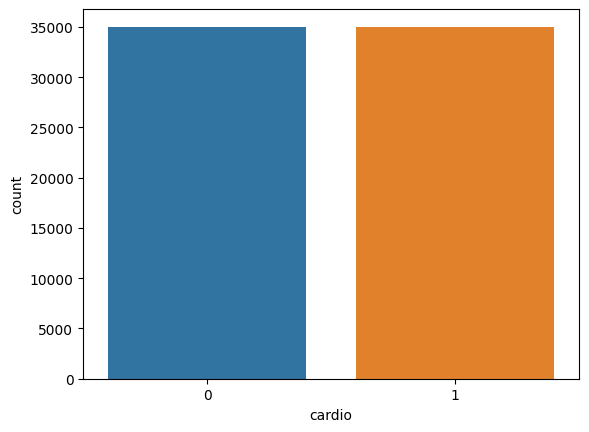

In [72]:
seaborn.countplot(x=df["cardio"])

<AxesSubplot: xlabel='gender', ylabel='count'>

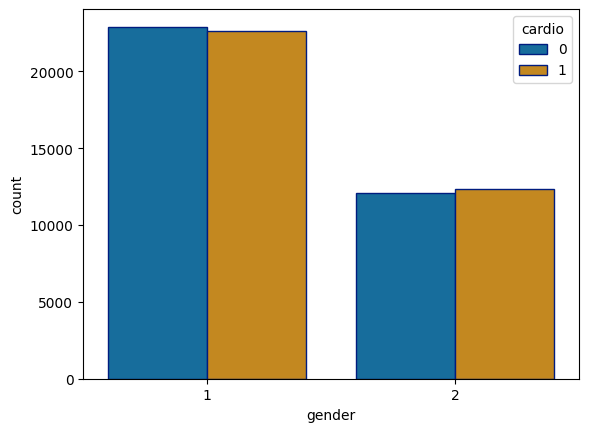

In [73]:
seaborn.countplot(x='gender', hue='cardio',data=df, palette='colorblind',edgecolor=seaborn.color_palette('dark', n_colors=1))

In [74]:
df['year'] = (df['age']/365).round(0)

In [75]:
df['year']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: year, Length: 70000, dtype: float64

<AxesSubplot: xlabel='year', ylabel='count'>

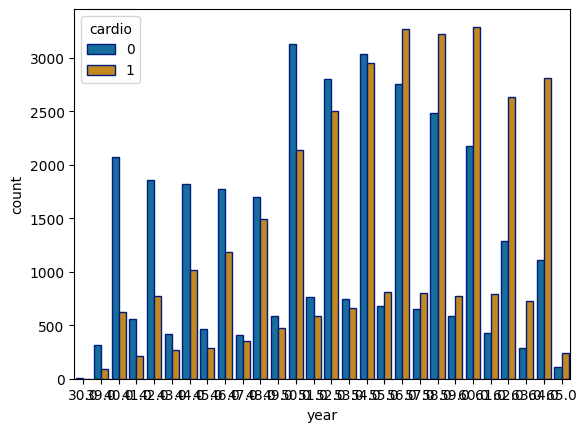

In [76]:
seaborn.countplot(x='year', hue='cardio',data=df, palette='colorblind',edgecolor=seaborn.color_palette('dark', n_colors=1))

In [77]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [78]:
df = df.drop(['year', 'id'], axis=1)

In [79]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [80]:
x = df.iloc[:,:-1]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [81]:
y = df.iloc[:,11]
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.3, random_state=1)

In [84]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [85]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
6670,16099,1,153,93.0,140,90,1,1,0,0,1
49567,14437,1,157,89.0,120,80,1,1,0,0,1
50796,19839,1,165,66.0,150,90,1,1,0,0,1
22310,18050,2,176,88.0,160,100,2,2,1,1,1
54037,16819,2,165,78.0,140,90,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15691,18263,1,170,70.0,120,80,1,1,0,0,1
25200,21081,1,165,60.0,120,70,3,1,0,0,1
7366,14716,1,170,68.0,100,60,1,1,0,0,1
56399,21998,1,165,66.0,110,80,1,1,0,0,1


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier()

In [88]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [89]:
rfc.score(xtest, ytest)

0.7173333333333334

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dtc = DecisionTreeClassifier()

In [92]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [93]:
dtc.score(xtest, ytest)

0.6324761904761905

In [94]:
dtc.predict(xtest)

array([1, 0, 1, ..., 0, 0, 1])

In [95]:
import pickle as pk

In [96]:
with open('cardio_rfc_model', 'wb') as file:
    pk.dump(rfc, file)

# Feature Selection

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [98]:
feature_fit = SelectKBest(score_func=f_classif)

In [99]:
feature_fit.fit(x,y)

SelectKBest()

In [100]:
score_col = pd.DataFrame(feature_fit.scores_,columns = ['score value'])

In [101]:
name_col = pd.DataFrame(x.columns)

In [102]:
top_features = pd.concat([name_col,score_col],axis=1)
top_features

,0,score value
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [103]:
top_features.nlargest(7,'score value')

,0,score value
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494


In [104]:
x_new = df[["age", "cholesterol","weight","gluc","ap_lo","ap_hi","active","smoke"]]
x_new

,age,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
0,18393,1,62.0,1,80,110,1,0
1,20228,3,85.0,1,90,140,1,0
2,18857,3,64.0,1,70,130,0,0
3,17623,1,82.0,1,100,150,1,0
4,17474,1,56.0,1,60,100,0,0
...,...,...,...,...,...,...,...,...
69995,19240,1,76.0,1,80,120,1,1
69996,22601,2,126.0,2,90,140,1,0
69997,19066,3,105.0,1,90,180,0,0
69998,22431,1,72.0,2,80,135,0,0


In [105]:
y_new = df["cardio"]
y_new

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y_new,test_size=.30,random_state=1)

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
Rfc = RandomForestClassifier()

In [109]:
Rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [110]:
Rfc.score(xtest,ytest)

0.6915714285714286

In [111]:
xtest

,age,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
6670,16099,1,93.0,1,90,140,1,0
49567,14437,1,89.0,1,80,120,1,0
50796,19839,1,66.0,1,90,150,1,0
22310,18050,2,88.0,2,100,160,1,1
54037,16819,1,78.0,1,90,140,0,0
...,...,...,...,...,...,...,...,...
15691,18263,1,70.0,1,80,120,1,0
25200,21081,3,60.0,1,70,120,1,0
7366,14716,1,68.0,1,60,100,1,0
56399,21998,1,66.0,1,80,110,1,0


# Feature Importance

In [112]:
from sklearn.ensemble import ExtraTreesClassifier

In [113]:
model = ExtraTreesClassifier()

In [114]:
model.fit(x,y)

ExtraTreesClassifier()

In [115]:
model.feature_importances_

array([0.28871847, 0.00570622, 0.1704497 , 0.17825745, 0.17838568,
       0.10912298, 0.04510331, 0.01143441, 0.00423841, 0.00404884,
       0.00453451])

In [116]:
top = pd.Series(model.feature_importances_, index = x.columns)
top

age            0.288718
gender         0.005706
height         0.170450
weight         0.178257
ap_hi          0.178386
ap_lo          0.109123
cholesterol    0.045103
gluc           0.011434
smoke          0.004238
alco           0.004049
active         0.004535
dtype: float64

<AxesSubplot: >

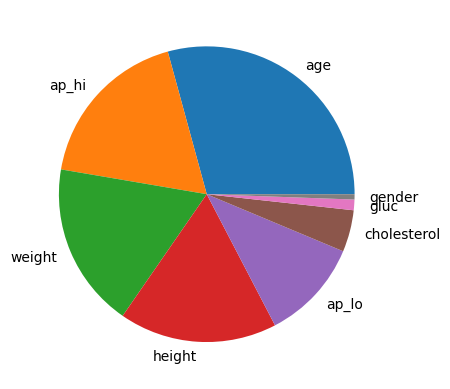

In [117]:
top.nlargest(8).plot(kind='pie')